# Data: Process and Plot Annual Maximums

The annual maximum, daily precipitation depth was extracted for each simulated year for weighted average daily values that represent the daily mean areal precipitation across the watershed. For PRISM there is only one watershed time series. For LOCA there are 64 models and so there are 64 area-averaged time series.

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Process_Events'
PRE_XLSX = "PRISM_AnnMaxSummary.xlsx"
PRE_SHT = "Export_WS"
LOCA_DP_ANN_STR = "Annual_M%d_1981-2010.pickle"
LOCA_P1_ANN_STR = "Annual_M%d_2011-2040.pickle"
LOCA_P2_ANN_STR = "Annual_M%d_2041-2070.pickle"
LOCA_P3_ANN_STR = "Annual_M%d_2071-2100.pickle"
NUM_MODEL = 64

In [4]:
OUT_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Events'

## Import PRISM

In [5]:
InFiler = os.path.normpath( os.path.join( IN_DIR, PRE_XLSX ) )
PRISM_DF = pd.read_excel( InFiler, sheet_name=PRE_SHT, header=0 )

In [6]:
display( HTML( PRISM_DF.head().to_html() ) )

,Year,WS_Val_mm
0,1981,60.458145
1,1982,33.283760
2,1983,61.166462
3,1984,57.542528
4,1985,42.819610


In [7]:
npPAnn = PRISM_DF['WS_Val_mm'].to_numpy()
npPAnn.shape

(30,)

In [8]:
npPAnn.min(), npPAnn.max()

(26.4203760068878, 85.4517607183314)

In [9]:
PRISM_DF = pd.read_excel( InFiler, sheet_name="Export_Max", header=0 )

In [10]:
npPrMax = PRISM_DF['Daily_Max'].to_numpy()

Output to a pickle in case that want to use it againa later

In [11]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "PRISM_DP_AnnMaxDailyPrecip.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( npPAnn, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

## Import and Process All LOCA Models

In [12]:
iI = 1
cAnnName = LOCA_DP_ANN_STR % iI
cAnnName

'Annual_M1_1981-2010.pickle'

In [13]:
InPickle = os.path.normpath( os.path.join( IN_DIR, cAnnName ) )
with open( InPickle, 'rb' ) as IP:
    cLADF = pickle.load( IP )
# end with

In [14]:
display( HTML( cLADF.head().to_html() ) )

,62,63,64,76,77,78,79,90,91,92,93,94,104,105,106,107,108,120,121,122,123,137,Daily_Max,WS_Val_mm
Datetime_UTC,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,56.029732,45.762917,44.819126,57.287228,45.932697,46.204517,45.252647,58.381367,46.336330,46.506496,46.443146,46.632103,47.054081,45.274345,45.466148,46.679741,48.266293,45.687531,47.608398,49.828648,52.748913,45.772263,58.381367,47.709315
1982-01-01,46.288948,43.792271,42.787815,45.200928,43.960720,43.079731,41.207005,45.146664,43.655663,42.975060,42.431515,40.923103,42.705563,42.950039,42.604763,41.843414,40.956177,42.856121,42.155724,41.066048,38.862846,36.171185,46.288948,42.967055
1983-01-01,19.435532,17.202805,17.655617,22.492928,17.426556,18.066236,18.317924,25.041464,20.022865,19.329683,18.936663,19.370743,26.149403,24.932140,24.730625,24.601929,23.386972,26.641893,26.333366,24.277088,23.950079,29.417276,29.417276,19.946541
1984-01-01,55.651733,56.606571,61.370392,54.818130,57.330784,60.266537,64.379532,53.984985,57.039959,58.806244,61.766735,54.597145,51.583954,54.212898,56.334713,58.727215,49.862484,51.267567,53.266598,45.801567,37.029312,35.250408,64.379532,56.369007
1985-01-01,16.177612,17.567995,20.948128,17.442831,17.660505,21.273380,27.104874,17.571556,17.776461,20.392803,26.953533,28.675360,15.142617,15.621329,18.738331,25.547361,27.461937,14.909570,21.470385,24.800037,26.057756,24.568703,28.675360,19.445644


In [15]:
ExHeader = "WS_Val_mm"

In [16]:
MaxHeader = "Daily_Max"

In [17]:
tstArray = cLADF[ExHeader].to_numpy()
tstArray.shape

(30,)

In [18]:
tstArray.min(), tstArray.max()

(19.169329808352167, 76.61664896671772)

In [19]:
tst2 = np.concatenate( [tstArray, tstArray], axis=0 )
tst2.shape

(60,)

In [20]:
tst2.min(), tst2.max()

(19.169329808352167, 76.61664896671772)

### Data Period

In [21]:
LOCAArrayList = list()

In [22]:
LOCAMaxList = list()

In [23]:
for iI in range( NUM_MODEL ):
    cAnnName = LOCA_DP_ANN_STR % ( iI + 1 )
    InPickle = os.path.normpath( os.path.join( IN_DIR, cAnnName ) )
    with open( InPickle, 'rb' ) as IP:
        cLADF = pickle.load( IP )
    # end with
    cAnnArray = cLADF[ExHeader].to_numpy()
    cAnnMax = cLADF[MaxHeader].to_numpy()
    LOCAArrayList.append( cAnnArray )
    LOCAMaxList.append( cAnnMax )
# end for

In [24]:
LOCA_DP = np.concatenate( LOCAArrayList, axis=0 )

In [25]:
LOCA_DP.min(), LOCA_DP.max()

(10.872987979692468, 113.17085077621086)

In [26]:
LOMax_DP = np.concatenate( LOCAMaxList, axis=0 )

In [27]:
LOMax_DP.min(), LOMax_DP.max()

(13.994807243347168, 141.0176544189453)

Output in case want to use it again

In [28]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_DP_AnnMaxDailyPrecip.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( LOCA_DP, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Project Period 1

In [29]:
LOCAArrayList = list()
LOCAMaxList = list()

In [30]:
for iI in range( NUM_MODEL ):
    cAnnName = LOCA_P1_ANN_STR % ( iI + 1 )
    InPickle = os.path.normpath( os.path.join( IN_DIR, cAnnName ) )
    with open( InPickle, 'rb' ) as IP:
        cLADF = pickle.load( IP )
    # end with
    cAnnArray = cLADF[ExHeader].to_numpy()
    cAnnMax = cLADF[MaxHeader].to_numpy()
    LOCAArrayList.append( cAnnArray )
    LOCAMaxList.append( cAnnMax )
# end for

In [31]:
LOCA_P1 = np.concatenate( LOCAArrayList, axis=0 )

In [32]:
LOCA_P1.min(), LOCA_P1.max()

(10.654603048162121, 131.5483300437349)

In [33]:
LOMax_P1 = np.concatenate( LOCAMaxList, axis=0 )

In [34]:
LOMax_P1.min(), LOMax_P1.max()

(11.798772811889648, 199.18130493164062)

Output in case want to use it again

In [35]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P1_AnnMaxDailyPrecip.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( LOCA_P1, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Project Period 2

In [36]:
LOCAArrayList = list()
LOCAMaxList = list()

In [37]:
for iI in range( NUM_MODEL ):
    cAnnName = LOCA_P2_ANN_STR % ( iI + 1 )
    InPickle = os.path.normpath( os.path.join( IN_DIR, cAnnName ) )
    with open( InPickle, 'rb' ) as IP:
        cLADF = pickle.load( IP )
    # end with
    cAnnArray = cLADF[ExHeader].to_numpy()
    cAnnMax = cLADF[MaxHeader].to_numpy()
    LOCAArrayList.append( cAnnArray )
    LOCAMaxList.append( cAnnMax )
# end for

In [38]:
LOCA_P2 = np.concatenate( LOCAArrayList, axis=0 )

In [39]:
LOCA_P2.min(), LOCA_P2.max()

(7.680177166252065, 143.28409825331778)

In [40]:
LOMax_P2 = np.concatenate( LOCAMaxList, axis=0 )

In [41]:
LOMax_P2.min(), LOMax_P2.max()

(9.59360408782959, 191.60682678222656)

Output in case want to use it again

In [42]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P2_AnnMaxDailyPrecip.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( LOCA_P2, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Project Period 3

In [43]:
LOCAArrayList = list()
LOCAMaxList = list()

In [44]:
for iI in range( NUM_MODEL ):
    cAnnName = LOCA_P3_ANN_STR % ( iI + 1 )
    InPickle = os.path.normpath( os.path.join( IN_DIR, cAnnName ) )
    with open( InPickle, 'rb' ) as IP:
        cLADF = pickle.load( IP )
    # end with
    cAnnArray = cLADF[ExHeader].to_numpy()
    cAnnMax = cLADF[MaxHeader].to_numpy()
    LOCAArrayList.append( cAnnArray )
    LOCAMaxList.append( cAnnMax )
# end for

In [45]:
LOCA_P3 = np.concatenate( LOCAArrayList, axis=0 )

In [46]:
LOCA_P3.min(), LOCA_P3.max()

(8.240325806391745, 157.31418039071772)

In [47]:
LOMax_P3 = np.concatenate( LOCAMaxList, axis=0 )

In [48]:
LOMax_P3.min(), LOMax_P3.max()

(12.089567184448242, 204.9809112548828)

Output in case want to use it again

In [49]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P3_AnnMaxDailyPrecip.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( LOCA_P3, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

## Plots

Use the next four lines if just want to load exiting dataframes for plotting

In [50]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "PRISM_DP_AnnMaxDailyPrecip.pickle" ) )
npPAnn = pd.read_pickle( InFiler )

In [51]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_DP_AnnMaxDailyPrecip.pickle" ) )
LOCA_DP = pd.read_pickle( InFiler )

In [52]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P1_AnnMaxDailyPrecip.pickle" ) )
LOCA_P1 = pd.read_pickle( InFiler )

In [53]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P2_AnnMaxDailyPrecip.pickle" ) )
LOCA_P2 = pd.read_pickle( InFiler )

In [54]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P3_AnnMaxDailyPrecip.pickle" ) )
LOCA_P3 = pd.read_pickle( InFiler )

For this example, use one plot with 4 split violins. Each violin corresponds to one analysis interval.

In [55]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

#### Make DataFrame for Split Violin

In [56]:
NumPRISM = npPAnn.shape[0]
NumPRISM

30

In [57]:
NumDP_LOCA = LOCA_DP.shape[0]
NumDP_LOCA

1920

In [58]:
NumP1_LOCA = LOCA_P1.shape[0]
NumP1_LOCA

1920

In [59]:
NumP2_LOCA = LOCA_P2.shape[0]
NumP2_LOCA

1920

In [60]:
NumP3_LOCA = LOCA_P3.shape[0]
NumP3_LOCA

1856

In [61]:
PRISM_Labels = [ "PRISM 1981-2010" for x in range( NumPRISM ) ]
LOCA_DP_Labels = [ "LOCA" for x in range( NumDP_LOCA ) ]
LOCA_P1_Labels = [ "LOCA" for x in range( NumP1_LOCA ) ]
LOCA_P2_Labels = [ "LOCA" for x in range( NumP2_LOCA ) ]
LOCA_P3_Labels = [ "LOCA" for x in range( NumP3_LOCA ) ]

In [62]:
AllLabels = deepcopy( PRISM_Labels )
AllLabels.extend( LOCA_DP_Labels )
AllLabels.extend( PRISM_Labels )
AllLabels.extend( LOCA_P1_Labels )
AllLabels.extend( PRISM_Labels )
AllLabels.extend( LOCA_P2_Labels )
AllLabels.extend( PRISM_Labels )
AllLabels.extend( LOCA_P3_Labels )
DPTotLen = len( AllLabels )
DPTotLen

7736

In [63]:
Interval_PRISM_DP = [ "1981-2010" for x in range( NumPRISM ) ]
Interval_PRISM_P1 = [ "2011-2040" for x in range( NumPRISM ) ] 
Interval_PRISM_P2 = [ "2041-2070" for x in range( NumPRISM ) ] 
Interval_PRISM_P3 = [ "2071-2099" for x in range( NumPRISM ) ]
Interval_LOCA_DP = [ "1981-2010" for x in range( NumDP_LOCA ) ]
Interval_LOCA_P1 = [ "2011-2040" for x in range( NumP1_LOCA ) ] 
Interval_LOCA_P2 = [ "2041-2070" for x in range( NumP2_LOCA ) ] 
Interval_LOCA_P3 = [ "2071-2099" for x in range( NumP3_LOCA ) ] 

In [64]:
AllIntervals = deepcopy( Interval_PRISM_DP )
AllIntervals.extend( Interval_LOCA_DP )
AllIntervals.extend( Interval_PRISM_P1 )
AllIntervals.extend( Interval_LOCA_P1 )
AllIntervals.extend( Interval_PRISM_P2 )
AllIntervals.extend( Interval_LOCA_P2 )
AllIntervals.extend( Interval_PRISM_P3 )
AllIntervals.extend( Interval_LOCA_P3 )

In [65]:
AllValues = np.concatenate( [ npPAnn, LOCA_DP, npPAnn, LOCA_P1, npPAnn, LOCA_P2, npPAnn, LOCA_P3 ], axis=0 )
AllValues.shape

(7736,)

In [66]:
AllMaxes = np.concatenate( [ npPrMax, LOMax_DP, npPrMax, LOMax_P1, npPrMax, LOMax_P2, npPrMax, LOMax_P3 ], axis=0 )
AllMaxes.shape

(7736,)

In [67]:
DataDict = { "Interval" :AllIntervals,
             "DLabel" : AllLabels,
             "AnnMax" : AllValues, }
DPDF = pd.DataFrame( data=DataDict )

In [68]:
DataDict = { "Interval" :AllIntervals,
             "DLabel" : AllLabels,
             "AnnMax" : AllMaxes, }
DPMaxDF = pd.DataFrame( data=DataDict )

In [69]:
preTicks = [ 10.0, 50.0, 100.0, 200.0, 300.0 ]

In [70]:
NOAA_24hr_2y = 76.0
NOAA_24hr_10y = 127.4
NOAA_24hr_25y = 167.3
NOAA_24hr_50y = 202.3
NOAA_24hr_100y = 242.7

In [71]:
NOAA_24hr_2y, NOAA_24hr_10y, NOAA_24hr_25y, NOAA_24hr_50y, NOAA_24hr_100y

(76.0, 127.4, 167.3, 202.3, 242.7)

#### Violin Plot

In [72]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "AnnMax_DailyPrecipTot_1981-2010.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\AnnMax_DailyPrecipTot_1981-2010.svg'

In [73]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "AnnMax_DailyPrecipTot_1981-2010.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\AnnMax_DailyPrecipTot_1981-2010.png'

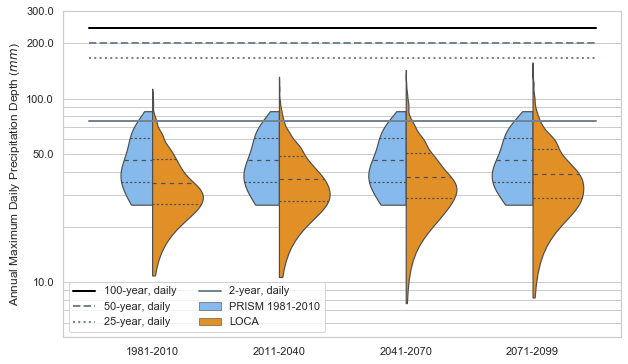

In [74]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Interval", y="AnnMax", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ "PRISM 1981-2010" : "xkcd:sky blue", 
                          "LOCA" : "xkcd:tangerine" },
                data=DPDF, ax=ax11, legend_out=True )
xAxTup = g.get_xlim( )
y100, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_100y, NOAA_24hr_100y ], linewidth=2.0,
                 linestyle='solid', color='xkcd:black', label="100-year, daily" )
y50, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_50y, NOAA_24hr_50y ], linewidth=2.0,
                linestyle='dashed', color='xkcd:steel', label="50-year, daily" )
y10, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_25y, NOAA_24hr_25y ], linewidth=2.0,
                linestyle='dotted', color='xkcd:steel', label="25-year, daily" )
y2, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_2y, NOAA_24hr_2y ], linewidth=2.0,
                linestyle='solid', color='xkcd:steel', label="2-year, daily" )
g.legend(loc="lower left", ncol=2, fontsize=11)
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=12 )
g.set_ylabel('Annual Maximum Daily Precipitation Depth ($mm$)', fontsize=12)
g.set_ylim( ( 5.0, 300.0 ))
g.tick_params(axis='both', which='major', labelsize=11)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [75]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "AnnGMax_DailyPrecipTot.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\AnnGMax_DailyPrecipTot.svg'

In [76]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "AnnGMax_DailyPrecipTot.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\AnnGMax_DailyPrecipTot.png'

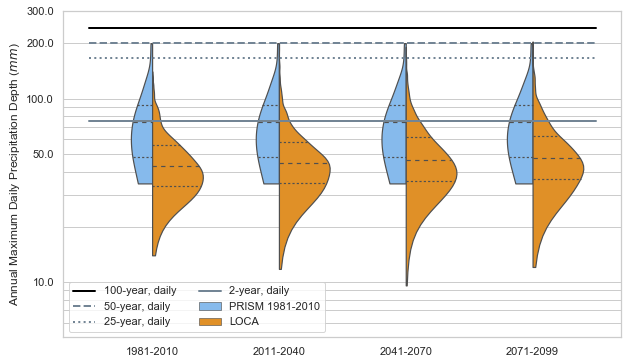

In [77]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Interval", y="AnnMax", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ "PRISM 1981-2010" : "xkcd:sky blue", 
                          "LOCA" : "xkcd:tangerine" },
                data=DPMaxDF, ax=ax11, legend_out=True )
xAxTup = g.get_xlim( )
y100, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_100y, NOAA_24hr_100y ], linewidth=2.0,
                 linestyle='solid', color='xkcd:black', label="100-year, daily" )
y50, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_50y, NOAA_24hr_50y ], linewidth=2.0,
                linestyle='dashed', color='xkcd:steel', label="50-year, daily" )
y10, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_25y, NOAA_24hr_25y ], linewidth=2.0,
                linestyle='dotted', color='xkcd:steel', label="25-year, daily" )
y2, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_2y, NOAA_24hr_2y ], linewidth=2.0,
                linestyle='solid', color='xkcd:steel', label="2-year, daily" )
g.legend(loc="lower left", ncol=2, fontsize=11)
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=12 )
g.set_ylabel('Annual Maximum Daily Precipitation Depth ($mm$)', fontsize=12)
g.set_ylim( ( 5.0, 300.0 ))
g.tick_params(axis='both', which='major', labelsize=11)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

#### Box and Whisker

In [ ]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "AnnMax_DailyPrecipTot_BW_1981-2010.svg") )
OutSVG

In [ ]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "AnnMax_DailyPrecipTot_BW_1981-2010.png") )
OutPNG

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
g = sns.boxplot( x="Interval", y="AnnMax", hue="DLabel",
                 dodge=True, linewidth=1.2, orient="v", showmeans=True,
                palette={ "PRISM 1981-2010" : "xkcd:sky blue", 
                          "LOCA" : "xkcd:tangerine" },
                data=DPDF, ax=ax11 )
xAxTup = g.get_xlim( )
y100, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_100y, NOAA_24hr_100y ], linewidth=2.0,
                 linestyle='solid', color='xkcd:black', label="100-year, daily" )
y50, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_50y, NOAA_24hr_50y ], linewidth=2.0,
                linestyle='dashed', color='xkcd:steel', label="50-year, daily" )
y25, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_25y, NOAA_24hr_25y ], linewidth=2.0,
                linestyle='dotted', color='xkcd:steel', label="25-year, daily" )
y2, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_2y, NOAA_24hr_2y ], linewidth=2.0,
                linestyle='solid', color='xkcd:steel', label="2-year, daily" )
g.legend(loc="lower left", ncol=2, fontsize=11)
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=12 )
g.set_ylabel('Annual Maximum Daily Precipitation Depth ($mm$)', fontsize=12)
g.set_ylim( ( 5.0, 300.0 ))
g.tick_params(axis='both', which='major', labelsize=11)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

#### Boxen 

In [ ]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "AnnMax_DailyPrecipTot_BXN_1981-2010.svg") )
OutSVG

In [ ]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "AnnMax_DailyPrecipTot_BXN_1981-2010.png") )
OutPNG

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
g = sns.boxenplot( x="Interval", y="AnnMax", hue="DLabel",
                   dodge=True, linewidth=1.2, orient="v",
                   palette={ "PRISM 1981-2010" : "xkcd:sky blue", 
                             "LOCA" : "xkcd:tangerine" },
                   data=DPDF, ax=ax11 )
xAxTup = g.get_xlim( )
y100, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_100y, NOAA_24hr_100y ], linewidth=2.0,
                 linestyle='solid', color='xkcd:black', label="100-year, daily" )
y50, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_50y, NOAA_24hr_50y ], linewidth=2.0,
                linestyle='dashed', color='xkcd:steel', label="50-year, daily" )
y25, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_25y, NOAA_24hr_25y ], linewidth=2.0,
                linestyle='dotted', color='xkcd:steel', label="25-year, daily" )
y2, = g.plot( [xAxTup[0], xAxTup[1]], [ NOAA_24hr_2y, NOAA_24hr_2y ], linewidth=2.0,
                linestyle='solid', color='xkcd:steel', label="2-year, daily" )
g.legend(loc="lower left", ncol=2, fontsize=11)
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=12 )
g.set_ylabel('Annual Maximum Daily Precipitation Depth ($mm$)', fontsize=12)
g.set_ylim( ( 5.0, 300.0 ))
g.tick_params(axis='both', which='major', labelsize=11)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )